multiple targets and output learning

In [17]:
import numpy as np

s1 = np.random.uniform(0,10, 1000)
s2 = np.random.uniform(0,10, 1000)

s3 = np.random.uniform(0,10, 1000)
s4 = np.random.uniform(0,10, 1000)


In [18]:
input = []
output1 = []
output2 = []
output3 = []
for i,j,k,l in zip(s1, s2, s3, s4):
    ii = int(i)
    jj = int(j)
    kk = int(k)
    ll = int(l) 
    x1 = ii*10.+jj
    x2 = kk*10.+ll
    
    y1=x1+ x2 # 목적 : 덧셈 학습
    #print(y1)
    yy = [  int((y1/100)%10), int((y1/10)%10), int(y1%10) ]
    input.append([ii,jj,kk,ll])
    
    output1.append( [int((y1/100)%10)] )
    output2.append( [int((y1/10)%10)] )
    output3.append( [int((y1)%10)] )
    
    print(str(x1)+"+"+str(x2)+" = "+str(y1)+" ; "+str(yy))
    
    

34.0+57.0 = 91.0 ; [0, 9, 1]
7.0+16.0 = 23.0 ; [0, 2, 3]
97.0+40.0 = 137.0 ; [1, 3, 7]
5.0+71.0 = 76.0 ; [0, 7, 6]
24.0+99.0 = 123.0 ; [1, 2, 3]
86.0+56.0 = 142.0 ; [1, 4, 2]
59.0+0.0 = 59.0 ; [0, 5, 9]
55.0+49.0 = 104.0 ; [1, 0, 4]
96.0+20.0 = 116.0 ; [1, 1, 6]
5.0+66.0 = 71.0 ; [0, 7, 1]
74.0+7.0 = 81.0 ; [0, 8, 1]
8.0+91.0 = 99.0 ; [0, 9, 9]
58.0+77.0 = 135.0 ; [1, 3, 5]
49.0+91.0 = 140.0 ; [1, 4, 0]
91.0+77.0 = 168.0 ; [1, 6, 8]
28.0+44.0 = 72.0 ; [0, 7, 2]
72.0+14.0 = 86.0 ; [0, 8, 6]
96.0+30.0 = 126.0 ; [1, 2, 6]
54.0+78.0 = 132.0 ; [1, 3, 2]
1.0+91.0 = 92.0 ; [0, 9, 2]
46.0+88.0 = 134.0 ; [1, 3, 4]
72.0+10.0 = 82.0 ; [0, 8, 2]
25.0+83.0 = 108.0 ; [1, 0, 8]
79.0+33.0 = 112.0 ; [1, 1, 2]
25.0+32.0 = 57.0 ; [0, 5, 7]
73.0+1.0 = 74.0 ; [0, 7, 4]
60.0+46.0 = 106.0 ; [1, 0, 6]
67.0+96.0 = 163.0 ; [1, 6, 3]
69.0+91.0 = 160.0 ; [1, 6, 0]
67.0+88.0 = 155.0 ; [1, 5, 5]
92.0+37.0 = 129.0 ; [1, 2, 9]
42.0+68.0 = 110.0 ; [1, 1, 0]
24.0+31.0 = 55.0 ; [0, 5, 5]
80.0+59.0 = 139.0 ; [1, 3, 9]
40

In [19]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets 
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable



x_data = Variable(torch.Tensor(input))
y_data1 = Variable(torch.Tensor(output1))
y_data2 = Variable(torch.Tensor(output2))
y_data3 = Variable(torch.Tensor(output3))


class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(4, 8)
        self.l2 = nn.Linear(8, 32)
        
        self.l31 = nn.Linear(32, 4)
        self.l32 = nn.Linear(32, 4)
        self.l33 = nn.Linear(32, 4)
        
        self.lo1 = nn.Linear(4, 1)
        self.lo2 = nn.Linear(4, 1)
        self.lo3 = nn.Linear(4, 1)        

    def forward(self, x):
        #x = x.view(-1, 4)  # Flatten the data (n, 1, 28, 28)-> (n, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x1 = F.relu(self.l31(x))
        x2 = F.relu(self.l32(x))        
        x3 = F.relu(self.l33(x))
        
        return self.lo1(x1), self.lo2(x2), self.lo3(x3)
    

model = Model()

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

losses1 =[]
losses2 =[]
losses3 =[]

for epoch in range(5000):
    y_pred1, y_pred2, y_pred3 = model(x_data)

    loss1 = criterion(y_pred1, y_data1)
    loss2 = criterion(y_pred2, y_data2)
    loss3 = criterion(y_pred3, y_data3)
    
    optimizer.zero_grad()
    if epoch%4 ==0:   loss1.backward()
    if epoch%4 ==1:   loss2.backward()
    if epoch%4 ==2:   loss3.backward()        
    
    ls1 =loss1.data[0]
    ls2 =loss2.data[0]
    ls3 =loss3.data[0]
    if epoch%4 ==3:
        if ls1>ls2 and ls1>ls3:   loss1.backward()
        if ls2>ls1 and ls2>ls3:   loss2.backward()
        if ls3>ls1 and ls3>ls2:   loss3.backward()  
    losses1.append(ls1)
    losses2.append(ls2)
    losses3.append(ls3)
        
    if epoch%100==0:
        print("epoch: {}, {:.6f},{:.6f},{:.6f} ".format(epoch, loss1.data[0], loss2.data[0], loss3.data[0]))    
    
    optimizer.step()


#for param in model.parameters():
#   print(param.data)



epoch: 0, 362.918304,23773.251953,30931.257812 
epoch: 100, 178.165405,17782.039062,15871.458984 
epoch: 200, 133.340912,9045.104492,9858.431641 
epoch: 300, 113.938652,8656.937500,9175.746094 
epoch: 400, 100.884285,8481.046875,8726.607422 
epoch: 500, 86.111130,8367.253906,8363.738281 
epoch: 600, 77.120987,8251.795898,8158.840820 
epoch: 700, 71.965805,8153.290039,7966.683105 
epoch: 800, 66.257263,8054.276855,7805.571777 
epoch: 900, 62.333683,7966.980957,7697.748047 
epoch: 1000, 59.639957,7895.303711,7631.992676 
epoch: 1100, 57.151978,7849.709473,7583.356934 
epoch: 1200, 54.979752,7809.987793,7540.763672 
epoch: 1300, 53.079048,7772.840820,7487.513184 
epoch: 1400, 50.839462,7729.893555,7447.481934 
epoch: 1500, 48.219006,7648.028320,7406.968262 
epoch: 1600, 45.522663,7568.136230,7325.635254 
epoch: 1700, 42.915695,7510.476074,7255.712402 
epoch: 1800, 40.356205,7453.928223,7180.544922 
epoch: 1900, 37.774513,7368.640625,7095.872559 
epoch: 2000, 34.757572,7172.578613,7007.918

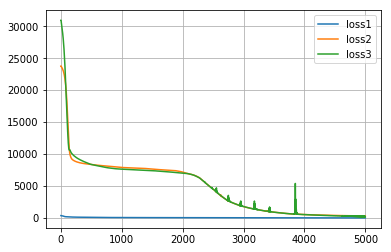

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline  



fig, ax = plt.subplots()
ax.plot(losses1, label='loss1')
ax.plot(losses2, label='loss2')
ax.plot(losses3, label='loss3')
ax.grid()
plt.legend()

plt.show()

In [25]:

#one test sample
test1 = Variable(torch.Tensor([[1,2,3,4]])) # for 12+34
y_pred1, y_pred2, y_pred3 = model(test1)
Y_pred = round( model(test1)[0].data[0][0])*100+round( model(test1)[1].data[0][0])*10+round( model(test1)[2].data[0][0])

print("12 + 34 = ",  Y_pred, 12+34==Y_pred )

12 + 34 =  46 True


In [24]:
test2 = Variable(torch.Tensor([[8,7,6,2]])) 
y_pred1, y_pred2, y_pred3 = model(test2)
Y_pred = round( model(test2)[0].data[0][0])*100+round( model(test2)[1].data[0][0])*10+round( model(test2)[2].data[0][0])

print("87 + 62 = ",  Y_pred, 87+62==Y_pred )


87 + 62 =  158 False


In [23]:
for param in model.parameters():
    print(param.data)



-0.2039  0.7221 -0.0996  0.7836
 0.1242 -0.1864  0.3903  0.5551
 0.5258  0.2614  0.5763  0.7117
-0.0863 -0.5232 -0.0084  0.1034
-0.1228 -0.1866  0.1023  0.5889
 0.5104  0.4103  0.5593 -0.2109
 0.1193 -0.1574  0.0830 -0.2830
-0.2977  0.3254 -0.1907 -0.5844
[torch.FloatTensor of size 8x4]


 0.8390
-0.1862
-1.6943
 0.2177
 1.8952
-0.2863
 2.8761
 0.3350
[torch.FloatTensor of size 8]


-0.3569  0.0186 -0.3534  0.1806  0.4467 -0.0040  1.4170  0.2846
-0.7055 -0.7260 -0.2331  0.0208  1.3288  0.2428  1.1287  0.5024
-0.1134  0.0783  0.1987  0.0089  0.0140  0.1617 -0.0580  0.1202
-0.0752  0.4273  0.2253  0.2677 -0.3615  0.0050  0.8763  0.1846
 1.0146 -0.4934 -1.1399  0.7128  0.8463 -0.5798  1.5236  0.7509
-0.2873  0.2861  0.3497 -0.1521 -0.4503  0.0881 -0.4900 -0.0747
 0.3779  0.3074  0.0810 -0.0328 -0.1785  0.3115 -0.2536  0.0969
-0.3208  0.2960  0.2455  0.2501 -0.3485  0.0877 -0.1311  0.4275
-0.1382 -0.0546 -0.2789 -0.0955 -0.0717 -0.3138 -0.2378 -0.0886
-0.1686 -0.0310 -0.0710  0.3001 -0.34